In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

x_array = []
y_array = []

file1 = open("0LC_data_sheet.data", "r")
file2 = open("M_data_sheet.data", "r")

#This is for file "0LC_data_sheet.data"
for line in file1:
    temp_list1 = []
    temp_list2 = []
    
    values = line.split()

    #temp_list1.append(values[3:]) #Grabbing the features

    x_array.append([float(z) for z in values[3:]])
    
    y_array.append(0)

file1.close()

#This is for file "M_data_sheet.data"
for line in file2:
    temp_list1 = []
    temp_list2 = []

    values = line.split()

    #temp_list1.append(values[4:]) #Grabbing the features

    temp_list2.append(values[3]) #Grabbing the parameters
    temp_list2.append(values[2])

    #Converts all values to float
    x_array.append([float(z) for z in values[4:]])
    
    y_array.append(1)

file2.close()


#Converts data to a NumPy array
x_array = np.array(x_array)
y_array = np.array(y_array)

#Makes the numbers larger by taking the log base 10 
#print(x_array[:3,:], y_array[:3])
x_array[:,0] = np.log10(x_array[:,0])
x_array[:,4] = np.log10(x_array[:,4])

#Creates the testing and the training lists into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.20, random_state=42)

#Creates a Random Forest Classifier and assigns it to forest
forest = RandomForestClassifier()

# for i in range(len(x_train)):
#     for j in range(len(x_train[0])):
#         #print("NaN =", np.isnan(float(x_train[i][j])))
#         #print("Inf =", np.isinf(float(x_train[i][j])))

#         if (( np.isnan(float(x_train[i][j])) == True) or (np.isinf(float(x_train[i][j])) == True ) ):
#             print("A wrong value was found at", i , j )
#             leave = True
#             break
#     if (leave == True):
#         break

#Trains the model (forest)

forest.fit(x_train, y_train) #NOTE this is changed for testing reasons

#print("Finished Training!")
#print("Calcuating Prediction")
#Creates a prediction of y varaibles based of the trained forest model
y_pred = forest.predict(x_test)

#print("Finished Predicting")

#print("Calculating Accuracy")

Accuracy = 99.94%
Precision = 99.91%
Recall = 100.00%


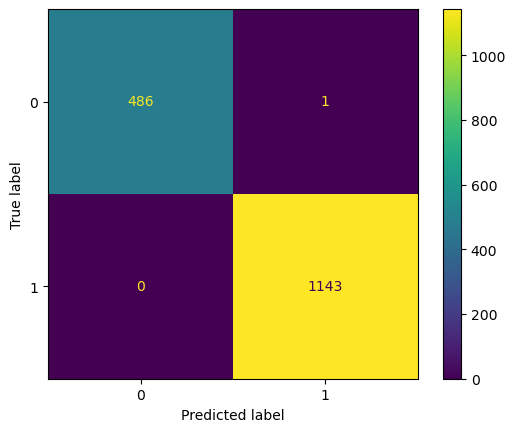

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy =", "{:.2f}".format(accuracy * 100) + "%" )
print("Precision =", "{:.2f}".format(precision * 100) + "%" )
print("Recall =", "{:.2f}".format(recall * 100) + "%" )


cm = confusion_matrix(y_test, y_pred)
display_confusion = ConfusionMatrixDisplay(confusion_matrix=cm)
display_confusion.plot()
#display_confusion.show()

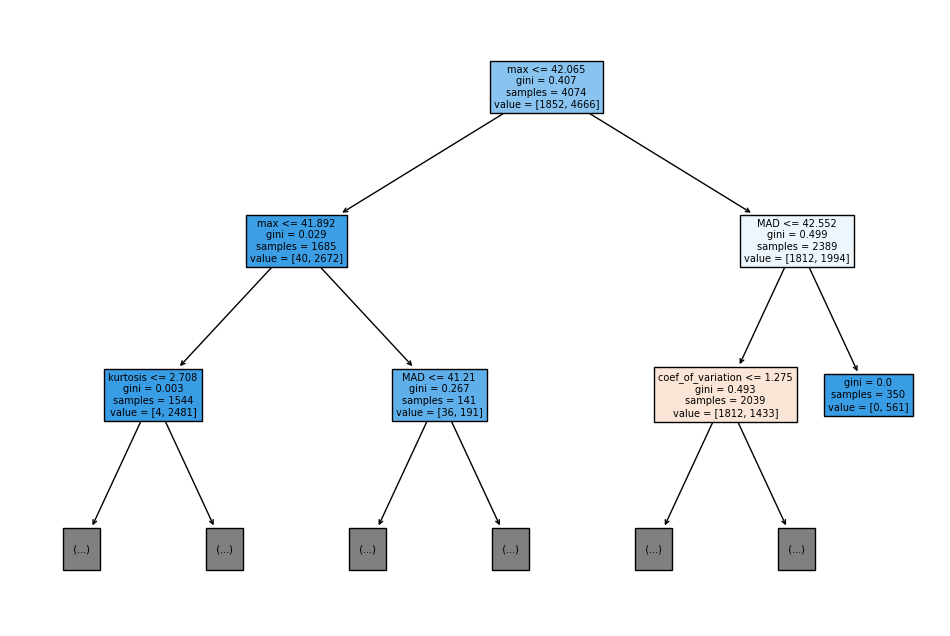

In [36]:
from sklearn import tree

fig, axes = plt.subplots(figsize=(12,8))
tree.plot_tree(forest.estimators_[0],
               feature_names = ["max","coef_of_variation","skew","kurtosis","MAD","deltaL15"], 
               max_depth=2,
               #class_names = ,
               filled = True)

plt.show()
# for i in range(3):
#     #tree = forest.estimators_[i]
#     forest.plot_tree(forest.estimators_[0],
#                feature_names = ["max","coef_of_variation","skew","kurtosis","MAD","deltaL15"], 
#                #class_names=cn,
#                filled = True)

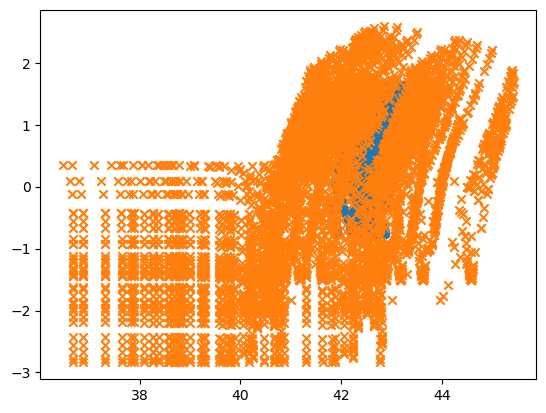

In [47]:
fig, ax = plt.subplots()
ax.scatter(x_array[:2340,0],x_array[:2340,2],marker="o")
ax.scatter(x_array[2340:,0],x_array[2340:,2],marker="x")


[0.23835659 0.15519675 0.13804102 0.10731847 0.23367414 0.12741302]
[0.13355229 0.08756635 0.07545962 0.04630768 0.14863142 0.08202787]


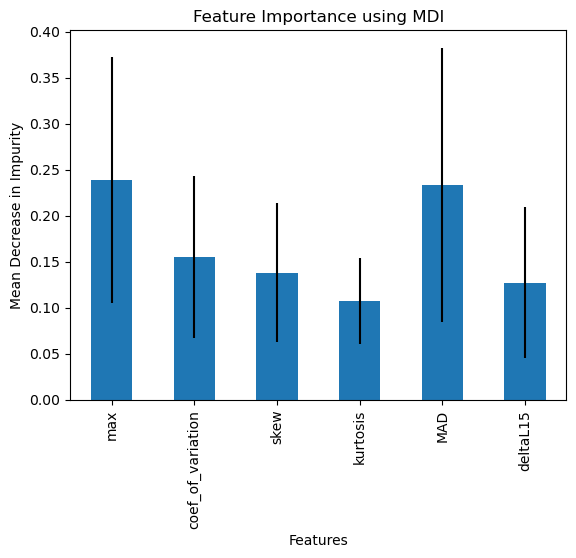

In [56]:
import pandas as pd
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
print(importances)
print(std)

forest_importances = pd.Series(importances, index = ["max","coef_of_variation","skew","kurtosis","MAD","deltaL15"])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_xlabel("Features")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_title("Feature Importance using MDI")
# Create a series containing feature importances from the model and feature names from the training data
#feature_importances = pd.Series(forest.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.show()
# Plot a simple bar chart
#feature_importances.plot.bar()